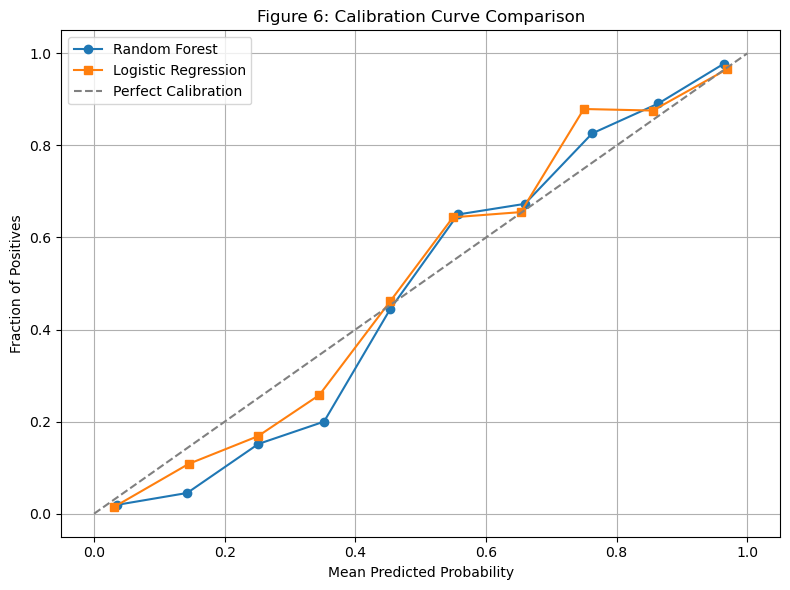

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
lr = LogisticRegression(max_iter=1000)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)


rf_probs = rf.predict_proba(X_test)[:, 1]
lr_probs = lr.predict_proba(X_test)[:, 1]


rf_prob_true, rf_prob_pred = calibration_curve(y_test, rf_probs, n_bins=10)
lr_prob_true, lr_prob_pred = calibration_curve(y_test, lr_probs, n_bins=10)


plt.figure(figsize=(8, 6))
plt.plot(rf_prob_pred, rf_prob_true, marker='o', label='Random Forest')
plt.plot(lr_prob_pred, lr_prob_true, marker='s', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Figure 6: Calibration Curve Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('calibration_curve.png', dpi=300)  # Saves the figure as a high-res PNG
plt.show()


In [3]:
netbenefit()

NameError: name 'netbenefit' is not defined

In [9]:
from sklearn.metrics import brier_score_loss
brier_rf = brier_score_loss(y_test, rf.predict_proba(X_test)[:, 1])


In [12]:
from sklearn.linear_model import LogisticRegression
import numpy as np


probs = rf.predict_proba(X_test)[:, 1].reshape(-1, 1)
cal_model = LogisticRegression().fit(probs, y_test)

slope = cal_model.coef_[0][0]
intercept = cal_model.intercept_[0]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def net_benefit(y_true, y_prob, threshold):
    y_pred = (y_prob >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    N = len(y_true)
    return (tp - fp * threshold / (1 - threshold)) / N

thresholds = np.linspace(0.01, 0.99, 50)
models = {'Logistic Regression': lr, 'Random Forest': rf, 'XGBoost': xgb}
benefits = {}

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    benefits[name] = [net_benefit(y_test, y_prob, t) for t in thresholds]

plt.figure(figsize=(8, 6))
for name, b in benefits.items():
    plt.plot(thresholds, b, label=name)
plt.plot(thresholds, [0]*len(thresholds), 'k--', label='Treat None')
plt.plot(thresholds, [sum(y_test)/len(y_test)]*len(thresholds), 'k:', label='Treat All')
plt.xlabel('Threshold Probability')
plt.ylabel('Net Benefit')
plt.title('Figure 7: Decision-Curve Analysis')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('figure7_dca.png', dpi=300)
plt.show()


NameError: name 'xgb' is not defined

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)


def net_benefit(y_true, y_prob, threshold):
    y_pred = (y_prob >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    N = len(y_true)
    return (tp - fp * threshold / (1 - threshold)) / N


thresholds = np.linspace(0.01, 0.99, 50)
models = {'Logistic Regression': lr, 'Random Forest': rf, 'XGBoost': xgb}
benefits = {}

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    benefits[name] = [net_benefit(y_test, y_prob, t) for t in thresholds]

# Step 4: Plot DCA
plt.figure(figsize=(8, 6))
for name, b in benefits.items():
    plt.plot(thresholds, b, label=name)
plt.plot(thresholds, [0]*len(thresholds), 'k--', label='Treat None')
plt.plot(thresholds, [sum(y_test)/len(y_test)]*len(thresholds), 'k:', label='Treat All')
plt.xlabel('Threshold Probability')
plt.ylabel('Net Benefit')
plt.title('Figure 7: Decision-Curve Analysis')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('figure7_dca.png', dpi=300)
plt.show()


ModuleNotFoundError: No module named 'xgboost'

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)


def net_benefit(y_true, y_prob, threshold):
    y_pred = (y_prob >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    N = len(y_true)
    return (tp - fp * threshold / (1 - threshold)) / N


thresholds = np.linspace(0.01, 0.99, 50)
models = {'Logistic Regression': lr, 'Random Forest': rf, 'XGBoost': xgb}
benefits = {}

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    benefits[name] = [net_benefit(y_test, y_prob, t) for t in thresholds]


plt.figure(figsize=(8, 6))
for name, b in benefits.items():
    plt.plot(thresholds, b, label=name)
plt.plot(thresholds, [0]*len(thresholds), 'k--', label='Treat None')
plt.plot(thresholds, [sum(y_test)/len(y_test)]*len(thresholds), 'k:', label='Treat All')
plt.xlabel('Threshold Probability')
plt.ylabel('Net Benefit')
plt.title('Figure 7: Decision-Curve Analysis')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('figure7_dca.png', dpi=300)
plt.show()


ModuleNotFoundError: No module named 'xgboost'

In [16]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 1.3 MB/s eta 0:00:44
    --------------------------------------- 0.8/56.8 MB 1.3 MB/s eta 0:00:44
    --------------------------------------- 1.0/56.8 MB 1.3 MB/s eta 0:00:43
    --------------------------------------- 1.0/56.8 MB 1.3 MB/s eta 0:00:43
    --------------------------------------- 1.3/56.8 MB 1.1 MB/s eta 0:00:50
   - -------------------------------------- 1.6/56.8 MB 1.1 MB/s eta 0:00:49
   - -------------------------------------- 1.8/56.8 MB 1.1 MB/s eta 0:00:51
   - -------------------------------------- 2.1/56.8 MB 1.1 MB/s eta 0:00:50
   - -------------------------------------- 2.4/56.8 MB 1.1 MB/s eta 0:00:49
   - -------------------------------------- 2.6/56.8 MB 1.1 MB/s eta 0:00:48
   -- ------

In [17]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 


lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)


def net_benefit(y_true, y_prob, threshold):
    y_pred = (y_prob >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    N = len(y_true)
    return (tp - fp * threshold / (1 - threshold)) / N


thresholds = np.linspace(0.01, 0.99, 50)
models = {'Logistic Regression': lr, 'Random Forest': rf, 'XGBoost': xgb}
benefits = {}

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    benefits[name] = [net_benefit(y_test, y_prob, t) for t in thresholds]


plt.figure(figsize=(8, 6))
for name, b in benefits.items():
    plt.plot(thresholds, b, label=name)
plt.plot(thresholds, [0]*len(thresholds), 'k--', label='Treat None')
plt.plot(thresholds, [sum(y_test)/len(y_test)]*len(thresholds), 'k:', label='Treat All')
plt.xlabel('Threshold Probability')
plt.ylabel('Net Benefit')
plt.title('Figure 7: Decision-Curve Analysis')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('figure7_dca.png', dpi=300)
plt.show()
from xgboost import XGBClassifier
print("XGBoost is working!")



ModuleNotFoundError: No module named 'xgboost'

In [19]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [21]:
from xgboost import XGBClassifier
print("XGBoost is working!")


ModuleNotFoundError: No module named 'xgboost'

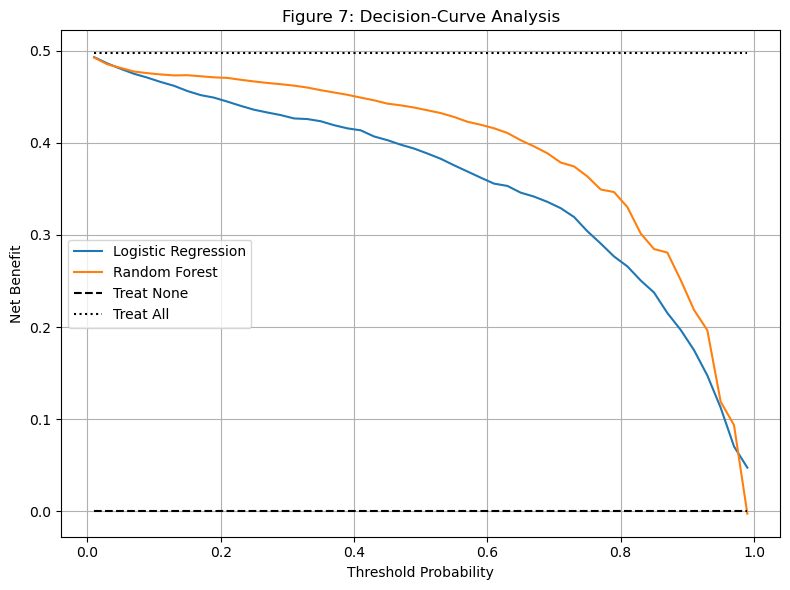

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)


def net_benefit(y_true, y_prob, threshold):
    y_pred = (y_prob >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    N = len(y_true)
    return (tp - fp * threshold / (1 - threshold)) / N


thresholds = np.linspace(0.01, 0.99, 50)
models = {'Logistic Regression': lr, 'Random Forest': rf}
benefits = {}

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    benefits[name] = [net_benefit(y_test, y_prob, t) for t in thresholds]


plt.figure(figsize=(8, 6))
for name, b in benefits.items():
    plt.plot(thresholds, b, label=name)
plt.plot(thresholds, [0]*len(thresholds), 'k--', label='Treat None')
plt.plot(thresholds, [sum(y_test)/len(y_test)]*len(thresholds), 'k:', label='Treat All')
plt.xlabel('Threshold Probability')
plt.ylabel('Net Benefit')
plt.title('Figure 7: Decision-Curve Analysis')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('figure7_dca.png', dpi=300)
plt.show()
